In [1]:
import numpy as np
import matplotlib.pyplot as plt
import toast.qarray as qa
from toast.tod.sim_focalplane import cartesian_to_quat

In [8]:
az_boresight = 25 * np.pi/180
el_boresight = 51 * np.pi/180

In [18]:
det_offset_x = -1.7 * np.pi/180 
det_offset_y = 1.8 * np.pi/180

In [19]:
az_det = az_boresight + det_offset_x/np.cos(el_boresight)
el_det = el_boresight + det_offset_y

az_det = np.rad2deg(az_det)
el_det = np.rad2deg(el_det)
print(az_det, el_det)

22.298673260588227 52.8


In [20]:
boresight_quat = qa.from_angles(
    theta = np.pi/2 - el_boresight,
    phi = -az_boresight,
    pa = 0
)

zaxis = np.array([0, 0, 1], dtype=np.float64)

wx = +det_offset_y
wy = +det_offset_x
wz = np.sqrt(1.0 - (wx * wx + wy * wy))
wdir = np.array([wx, wy, wz])
det_quat = qa.from_vectors(zaxis, wdir)
total_quat = qa.mult(boresight_quat, det_quat)

theta, phi, _ = qa.to_angles(total_quat)

phi = np.rad2deg(phi)
theta = np.rad2deg(theta)
print(-phi+360, 90-theta)

22.189167677318267 52.76786737159531


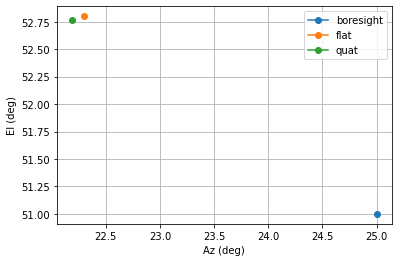

In [21]:
plt.plot(np.rad2deg(az_boresight), np.rad2deg(el_boresight), marker='o', label='boresight')
plt.plot(az_det, el_det, marker='o', label='flat')
plt.plot(-phi+360, 90-theta, marker='o', label='quat')
plt.xlabel('Az (deg)')
plt.ylabel('El (deg)')
plt.legend()
plt.grid()

In [14]:
print(
    'Errors in degrees',
    -phi+360 - az_det,
    90-theta - el_det
)

Errors in degrees -0.046285282826463714 -0.030645059389463825
